# Heart Disease Prediction

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')

#### Detecting Outliers

In [2]:
def drop_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   df = df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]
   return df

In [3]:
df = drop_outliers_IQR(df)
print(df.shape)

(228, 14)


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


In [6]:
#Filtering out only the patients with heart diseases
with_disease = df[df['target'].isin([1])]
with_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1


In [7]:
gender_counts = with_disease.sex.value_counts()
gender_counts

1    70
0    62
Name: sex, dtype: int64

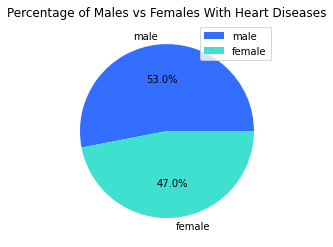

In [8]:
import matplotlib.pyplot as plt
import seaborn
plt.pie(gender_counts, labels = ["male", "female"],colors = ["#336EFF","turquoise"],autopct='%1.1f%%',)
plt.title("Percentage of Males vs Females With Heart Diseases")
plt.legend()
plt.show()

In [9]:
with_disease['age_group']=pd.cut(with_disease['age'],
                               bins=[28, 40, 50, 60, 999], 
                               labels=['29-40', '41-50', '51-60','60+'])
with_disease

C:\Users\DELL\AppData\Local\Temp\ipykernel_15628\1853143736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_disease['age_group']=pd.cut(with_disease['age'],


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,29-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,51-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,51-60
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1,29-40
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1,51-60
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1,51-60
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1,51-60


[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Number of Patients')]

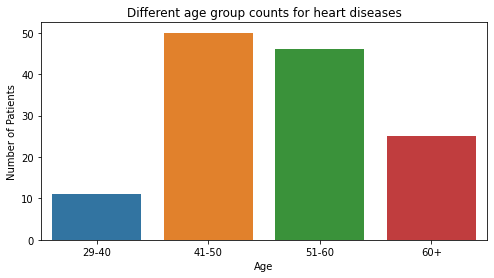

In [10]:
import seaborn as sns
age_group_counts = with_disease.age_group.value_counts()
plt.figure(figsize=(8, 4))
plt.title("Different age group counts for heart diseases")
ax=sns.barplot(x=age_group_counts.index, y=age_group_counts);
ax.set(xlabel='Age', ylabel='Number of Patients')

#### Data Standardization

In [23]:
from sklearn.preprocessing import MinMaxScaler
def scaler(df,arr):
    dataframe_N=df[arr]
    scale = MinMaxScaler(feature_range=(0,1))
    norm_data=scale.fit_transform(dataframe_N)
    return norm_data
scaled_features = ['age', 'trestbps', 'chol', 'thalach','oldpeak', 'slope', 'thal']
df[scaled_features]=scaler(df,scaled_features)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,0.170213,1,2,0.473684,0.519651,0,1,0.868421,0,0.875,0.0,0,0.5,1
2,0.255319,0,1,0.473684,0.318777,0,0,0.736842,0,0.350,1.0,0,0.5,1
3,0.574468,1,1,0.342105,0.458515,0,1,0.789474,0,0.200,1.0,0,0.5,1
4,0.595745,0,0,0.342105,0.973799,0,1,0.657895,1,0.150,1.0,0,0.5,1
5,0.595745,1,0,0.605263,0.266376,0,1,0.526316,0,0.100,0.5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.723404,0,0,0.394737,0.288210,0,1,0.421053,1,0.000,0.5,0,0.5,0
298,0.595745,0,0,0.605263,0.480349,0,1,0.307018,1,0.050,0.5,0,1.0,0
299,0.340426,1,3,0.210526,0.580786,0,1,0.385965,0,0.300,0.5,0,1.0,0
301,0.595745,1,0,0.473684,0.000000,0,1,0.236842,1,0.300,0.5,1,1.0,0
